In [8]:
import batman
import numpy as np
import matplotlib.pyplot as plt

In [9]:
t = np.arange(0, 30, 0.001388889) #2 minutes = 0.001388889 day

In [10]:
planet_b_params = batman.TransitParams()
planet_b_params.ecc = 0.159
planet_b_params.w = 90.
planet_b_params.limb_dark = "quadratic"
planet_b_params.u = [0.2366419727326458, 0.2819412888558852] #Estimated by .ipynb
planet_b_params.t0 = 1.0
planet_b_params.rp = 0.1508
planet_b_params.per = 3
planet_b_params.inc = 88.9
planet_b_params.a = 6.05

planet_b_m = batman.TransitModel(planet_b_params, t)
planet_b_flux = planet_b_m.light_curve(planet_b_params)

In [11]:
planet_c_params = batman.TransitParams()
planet_c_params.ecc = 0.05
planet_c_params.w = 90.
planet_c_params.limb_dark = "quadratic"
planet_c_params.u = [0.2366419727326458, 0.2819412888558852] #Estimated by .ipynb
planet_c_params.t0 = 3.0
planet_c_params.rp = 0.145
planet_c_params.per = 5
planet_c_params.inc = 88.9
planet_c_params.a = 7.16

planet_c_m = batman.TransitModel(planet_c_params, t)
planet_c_flux = planet_c_m.light_curve(planet_c_params)

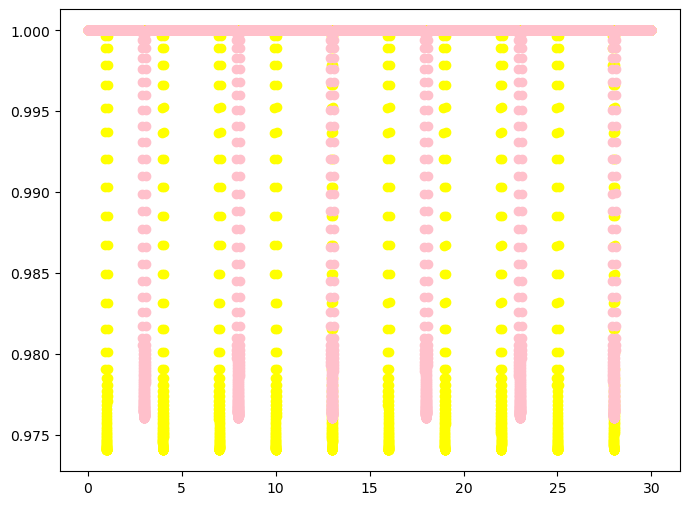

In [12]:
fig, ax = plt.subplots(1, figsize=(8,6))
plt.scatter(t, planet_b_flux, color="yellow")
plt.scatter(t, planet_c_flux, color="pink")

In [13]:
combined_flux = []
for b_flux, c_flux in zip(planet_b_flux, planet_c_flux):
    if b_flux == c_flux:
        combined_flux.append(b_flux)

    elif b_flux > c_flux:
        combined_flux.append(c_flux)

    elif b_flux < c_flux:
        combined_flux.append(b_flux)
combined_flux = np.array(combined_flux)

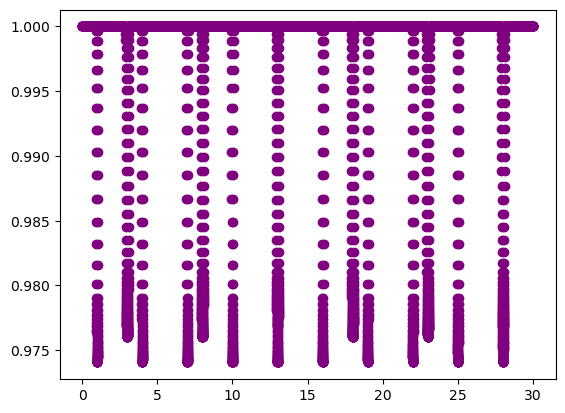

In [14]:
plt.scatter(t, combined_flux, color="purple")